# 1. Imports 

## Libraries

In [1]:
from neuralNetworkFromScratch import NeuralNetworkFromScratch

In [2]:
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

## Data

In [3]:
def load_data():
    train_dataset = h5py.File('../data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


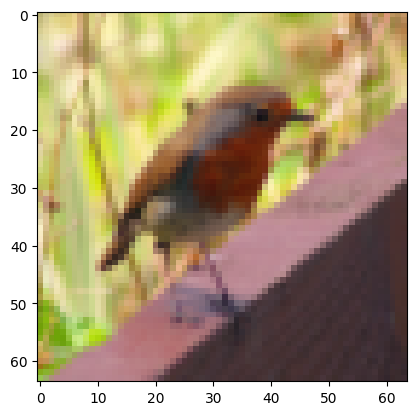

In [5]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# 2. Preprocessing

In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# 3. Training

In [7]:
model = NeuralNetworkFromScratch(layers_dims=[12288, 20, 7, 5, 1], cost_function='cross_entropy', learning_rate=0.0075, num_iterations=3000, print_cost=True)

In [8]:
parameters, costs = model.fit(train_x, train_y)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101356
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.4654773771766851
Cost after iteration 800: 0.36912585249592794
Cost after iteration 900: 0.39174697434805356
Cost after iteration 1000: 0.3151869888600615
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.16118854665827753
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.12974017549190123
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.1078392

In [9]:
pred_train = model.predict(train_x, train_y)

Accuracy: 0.9904306220095691


Text(0, 0.5, 'Cost Function')

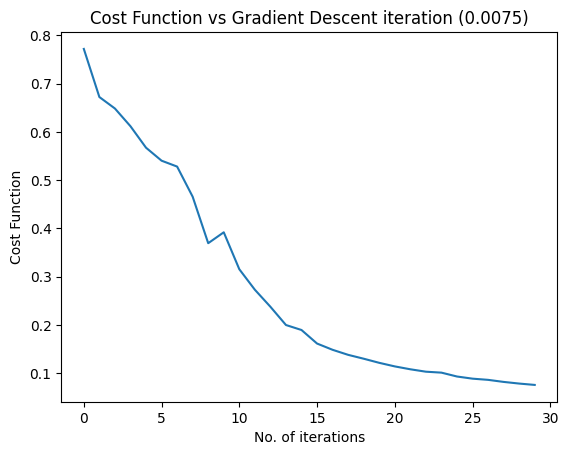

In [10]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, len(model.costs)), model.costs)
plt.title(f'Cost Function vs Gradient Descent iteration ({model.learning_rate})')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function')

# 4. Inference

In [11]:
pred_test = model.predict(test_x, test_y)

Accuracy: 0.8200000000000001


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


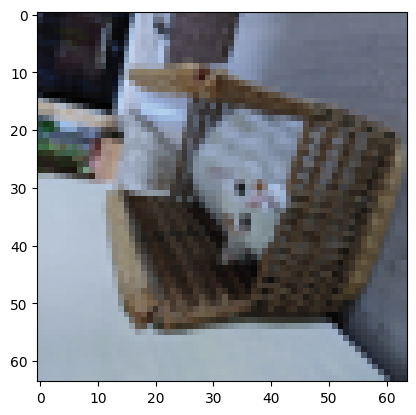

In [13]:
my_image = "my_image.jpg" # change this to the name of your image file
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
num_px = 64

fname = "../data/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = model.predict(image, my_label_y)

print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")